## ANALISIS DE DATOS FASE 5
## YEILER CORTES
## UNAD-2024

## regresión Logistica

In [708]:
import numpy as np
import pandas as pd

import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
%matplotlib inline


# librerías de para evaluar el modelo
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [710]:
## cargue de data y asignación

In [712]:
data=pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [714]:
data.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin"], axis=1, inplace= True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [716]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [718]:
## variables de cada columna

In [720]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [722]:
## limpiar data, dejando solo las columnas que se van a analizar

In [724]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [726]:
## variables de cada columna con las columnas deseadas

In [728]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [730]:
## Hay 891 datos y vemos que en las variables Age y Embarked faltan datos.

In [732]:
data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

 sobrevivieron 342 pasajeros

## Balance de sobrevivientes

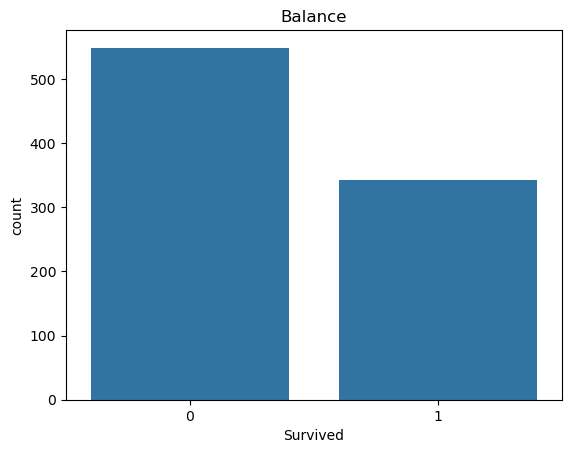

In [736]:
plt.title("Balance")
sns.countplot(x='Survived', data=data);
plt.show()

## Histograma de edad

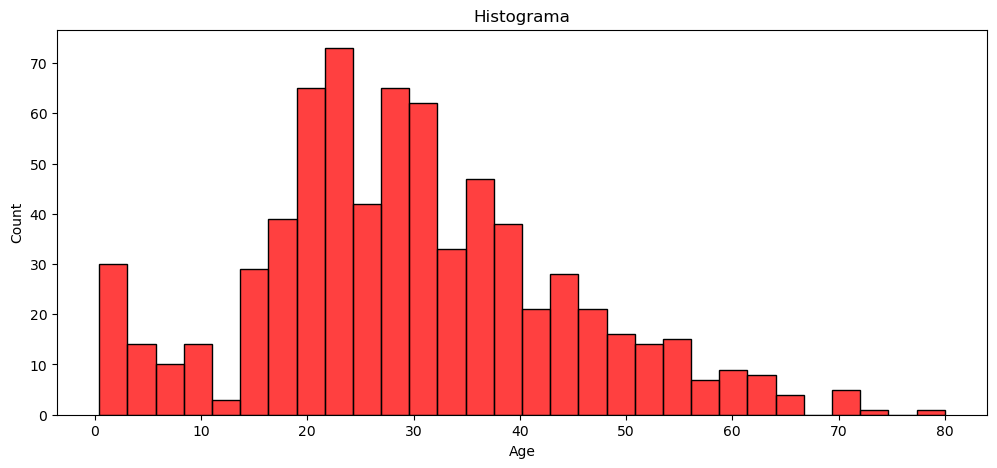

In [739]:
plt.figure(figsize =(12,5))
plt.title("Histograma")
sns.histplot(data = data, x='Age', bins = 30, color = "red");
plt.show()

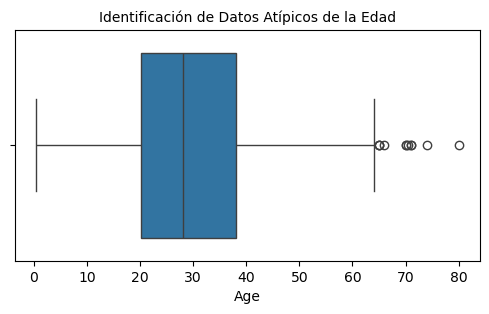

In [740]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age'])
plt.title('Identificación de Datos Atípicos de la Edad', fontsize=10 )
plt.show()

## Histograma de edad segun la supervivencia

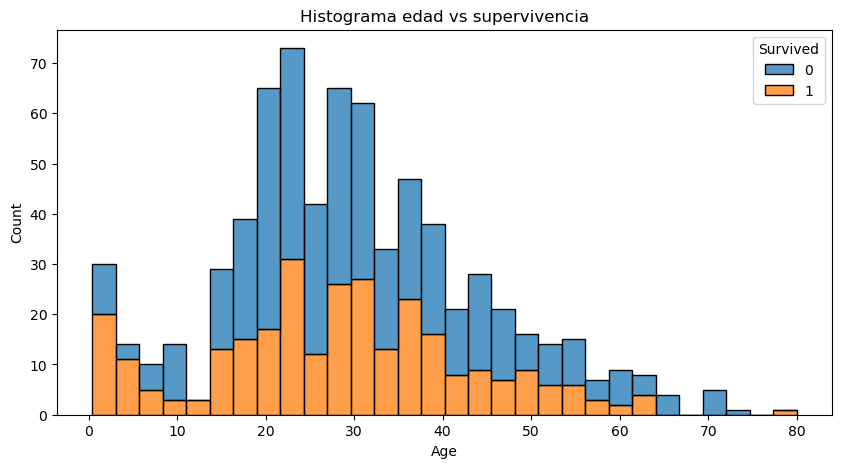

In [744]:
plt.figure(figsize =(10,5))
plt.title("Histograma edad vs supervivencia")
sns.histplot(data = data, x='Age', bins = 30, hue = 'Survived', multiple ="stack");
plt.show()

### según la grafica sobrevivio mas los menores de edad que los adultos mayores

## sobrevivientes según el genero

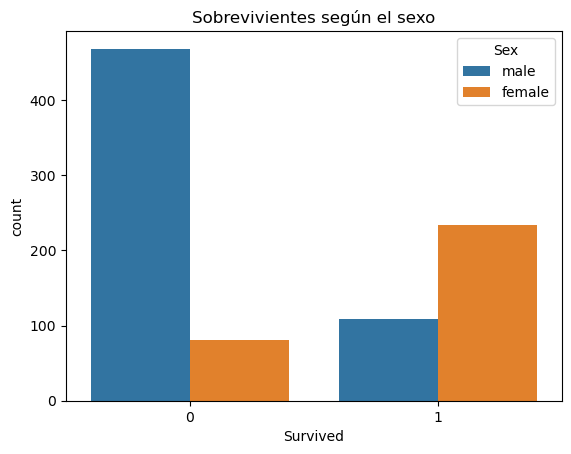

In [748]:
plt.title("Sobrevivientes según el sexo")
sns.countplot(x='Survived', data=data, hue="Sex");
plt.show()

### segun la grafica fallecieron más los hombres que las mujeres

# sobrevivientes por clase de pasajeros

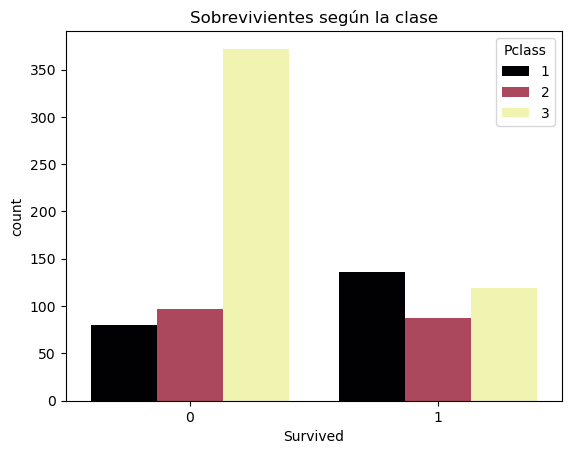

In [752]:
plt.title("Sobrevivientes según la clase")
sns.countplot(x='Survived', hue="Pclass", data=data, palette='inferno');
plt.show()

### no sobrevivieron en su mayoria los de la 3era clase

In [755]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [757]:
data[data.Age < 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
78,1,2,male,0.83,0,2,S
305,1,1,male,0.92,1,2,S
469,1,3,female,0.75,2,1,C
644,1,3,female,0.75,2,1,C
755,1,2,male,0.67,1,1,S
803,1,3,male,0.42,0,1,C
831,1,2,male,0.83,1,1,S


In [759]:
data.drop([78, 305, 469, 644, 755, 803, 831], inplace =True)

In [761]:
data.Age.mean()

29.985855728429986

In [763]:
data["Age"].fillna(data.Age.mean() , inplace = True)

In [765]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 884 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  884 non-null    int64  
 1   Pclass    884 non-null    int64  
 2   Sex       884 non-null    object 
 3   Age       884 non-null    float64
 4   SibSp     884 non-null    int64  
 5   Parch     884 non-null    int64  
 6   Embarked  882 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.2+ KB


In [767]:
data.dropna(inplace=True)


In [770]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  882 non-null    int64  
 1   Pclass    882 non-null    int64  
 2   Sex       882 non-null    object 
 3   Age       882 non-null    float64
 4   SibSp     882 non-null    int64  
 5   Parch     882 non-null    int64  
 6   Embarked  882 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.1+ KB


In [773]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [775]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)
pclass = pd.get_dummies(data['Pclass'],drop_first=True)
sibsp = pd.get_dummies(data['SibSp'],drop_first=True, prefix ="Sibsp_")
parch = pd.get_dummies(data['Parch'],drop_first=True, prefix = "Parch_")


In [777]:
data.drop(['Sex' , 'Embarked','Pclass','SibSp','Parch'],axis=1,inplace=True)

In [779]:
data= pd.concat([data,sex,embark,pclass, sibsp, parch], axis=1)

In [781]:
data.head()

,Survived,Age,male,Q,S,2,3,Sibsp__1,Sibsp__2,Sibsp__3,Sibsp__4,Sibsp__5,Sibsp__8,Parch__1,Parch__2,Parch__3,Parch__4,Parch__5,Parch__6
0,0,22.0,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False
1,1,38.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,1,26.0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,1,35.0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,0,35.0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [783]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882 entries, 0 to 890
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  882 non-null    int64  
 1   Age       882 non-null    float64
 2   male      882 non-null    bool   
 3   Q         882 non-null    bool   
 4   S         882 non-null    bool   
 5   2         882 non-null    bool   
 6   3         882 non-null    bool   
 7   Sibsp__1  882 non-null    bool   
 8   Sibsp__2  882 non-null    bool   
 9   Sibsp__3  882 non-null    bool   
 10  Sibsp__4  882 non-null    bool   
 11  Sibsp__5  882 non-null    bool   
 12  Sibsp__8  882 non-null    bool   
 13  Parch__1  882 non-null    bool   
 14  Parch__2  882 non-null    bool   
 15  Parch__3  882 non-null    bool   
 16  Parch__4  882 non-null    bool   
 17  Parch__5  882 non-null    bool   
 18  Parch__6  882 non-null    bool   
dtypes: bool(17), float64(1), int64(1)
memory usage: 35.3 KB


In [785]:
X_train


,Age,male,Q,S,2,3,Sibsp__1,Sibsp__2,Sibsp__3,Sibsp__4,Sibsp__5,Sibsp__8,Parch__1,Parch__2,Parch__3,Parch__4,Parch__5,Parch__6
12,20.000000,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
159,29.985856,True,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False,False
129,45.000000,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
446,13.000000,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False
237,8.000000,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,17.000000,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
194,44.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
633,29.985856,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
563,29.985856,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [794]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [796]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [798]:
print (X_train)

           Age   male      Q      S      2      3  Sibsp__1  Sibsp__2  \
12   20.000000   True  False   True  False   True     False     False   
159  29.985856   True  False   True  False   True     False     False   
129  45.000000   True  False   True  False   True     False     False   
446  13.000000  False  False   True   True  False     False     False   
237   8.000000  False  False   True   True  False     False     False   
..         ...    ...    ...    ...    ...    ...       ...       ...   
844  17.000000   True  False   True  False   True     False     False   
194  44.000000  False  False  False  False  False     False     False   
633  29.985856   True  False   True  False  False     False     False   
563  29.985856   True  False   True  False   True     False     False   
689  15.000000  False  False   True  False  False     False     False   

     Sibsp__3  Sibsp__4  Sibsp__5  Sibsp__8  Parch__1  Parch__2  Parch__3  \
12      False     False     False     False   

In [800]:
print (y_train)

12     0
159    0
129    0
446    1
237    1
      ..
844    0
194    1
633    0
563    0
689    1
Name: Survived, Length: 617, dtype: int64
